In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import Data in Dataset 

In [211]:
df=pd.read_csv('Amazon Sale Report.csv',encoding='utf')


#overview

In [214]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


# Data Processing and Cleaning

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

#drop unwanted columns from dataset  columns=[New,pendings]

In [220]:
df.drop(columns=['New', 'PendingS'], inplace=True,axis=1)

#check null values 

In [223]:

df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64


clean null values

In [226]:
df.dropna(inplace=True)

#check after cleaning no of null values

In [229]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               37514 non-null  int64  
 1   Order ID            37514 non-null  object 
 2   Date                37514 non-null  object 
 3   Status              37514 non-null  object 
 4   Fulfilment          37514 non-null  object 
 5   Sales Channel       37514 non-null  object 
 6   ship-service-level  37514 non-null  object 
 7   Category            37514 non-null  object 
 8   Size                37514 non-null  object 
 9   Courier Status      37514 non-null  object 
 10  Qty                 37514 non-null  int64  
 11  currency            37514 non-null  object 
 12  Amount              37514 non-null  float64
 13  ship-city           37514 non-null  object 
 14  ship-state          37514 non-null  object 
 15  ship-postal-code    37514 non-null  float64
 16  ship-cou

change data type column from object to Date

In [234]:
df['Date']=pd.to_datetime(df['Date'])

C:\Users\hp\AppData\Local\Temp\ipykernel_8768\3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [236]:
df.drop('date',axis=1,inplace=True)

KeyError: "['date'] not found in axis"

#change data type of ship-postal-code to int

In [239]:
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               37514 non-null  int64         
 1   Order ID            37514 non-null  object        
 2   Date                37514 non-null  datetime64[ns]
 3   Status              37514 non-null  object        
 4   Fulfilment          37514 non-null  object        
 5   Sales Channel       37514 non-null  object        
 6   ship-service-level  37514 non-null  object        
 7   Category            37514 non-null  object        
 8   Size                37514 non-null  object        
 9   Courier Status      37514 non-null  object        
 10  Qty                 37514 non-null  int64         
 11  currency            37514 non-null  object        
 12  Amount              37514 non-null  float64       
 13  ship-city           37514 non-null  object        

Rename the column Qty to quantity

In [244]:
df.rename(columns={'Qty':'quantity'},inplace=True)

In [246]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [248]:
df.shape

(37514, 19)

In [250]:
df.describe()

,index,Date,quantity,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [253]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


# data analysis and visualization

In [255]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship


# We analyze which category has most quantity 

In [308]:
df['Category']=df['Category'].astype('str')
gb=df.groupby('Category')['quantity'].sum()

C:\Users\hp\AppData\Local\Temp\ipykernel_8768\1140580810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb.index, y=gb.values, palette="viridis")


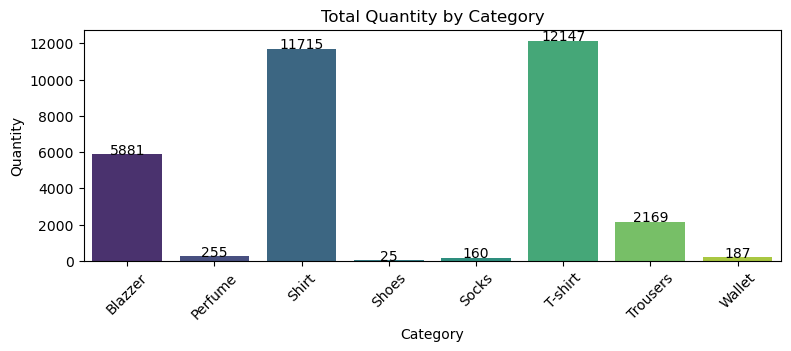

In [314]:
plt.figure(figsize=(9,3))
sns.barplot(x=gb.index, y=gb.values, palette="viridis")  


plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.title("Total Quantity by Category")
for index, value in enumerate(gb.values):
    plt.text(x=index, y=value + 0.5, s=str(value), ha='center')  # Adjust 'y=value + 0.5' for spacing

plt.show()

as show in above figiure shirty category has most stock

# category wise sells

C:\Users\hp\AppData\Local\Temp\ipykernel_8768\2992310517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb.index, y=gb.values, palette="viridis")


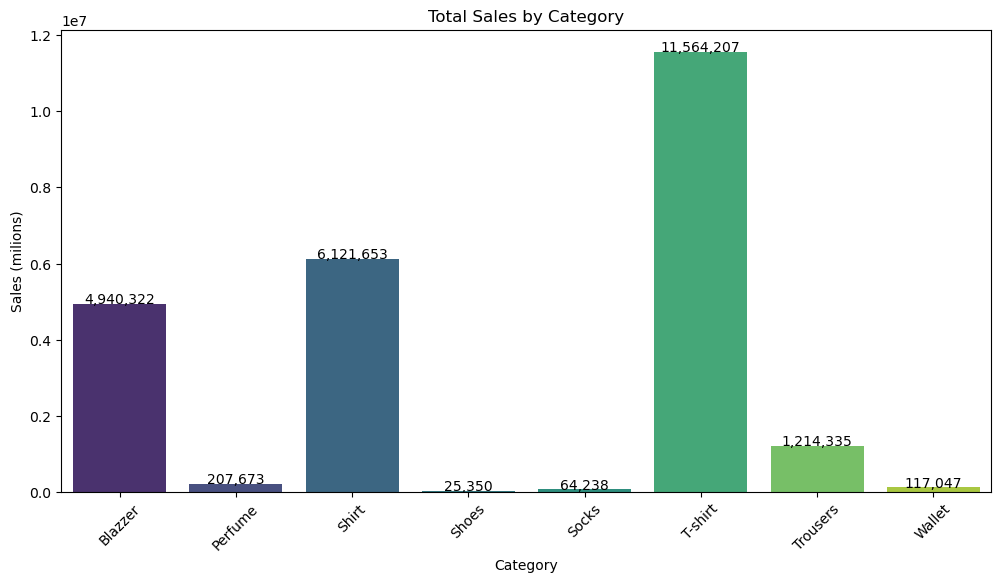

In [332]:
gb = df.groupby('Category')['Amount'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=gb.index, y=gb.values, palette="viridis")

# Customizing the plot
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Sales (milions)")
plt.title("Total Sales by Category")


for index, value in enumerate(gb.values):
    plt.text(x=index, y=value + 0.5, s=f"{value:,.0f}", ha='center')  

plt.show()

# which state has most sale

C:\Users\hp\AppData\Local\Temp\ipykernel_8768\1117978715.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb.index, y=gb.values, palette="viridis")


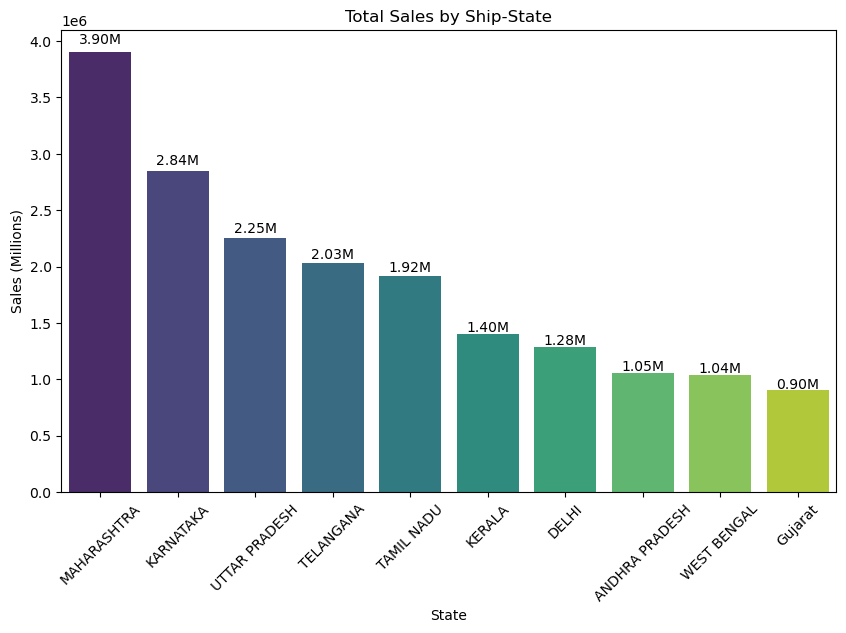

In [350]:
gb = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=gb.index, y=gb.values, palette="viridis")

# Customizing the plot
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Sales (Millions)")
plt.title("Total Sales by Ship-State")


for index, value in enumerate(gb.values):
    plt.text(x=index, y=value + (0.02 * value), s=f"{value / 1_000_000:.2f}M", ha='center')  # Converts to millions

plt.show()


#as you see in above figure maharastra has most sales in india

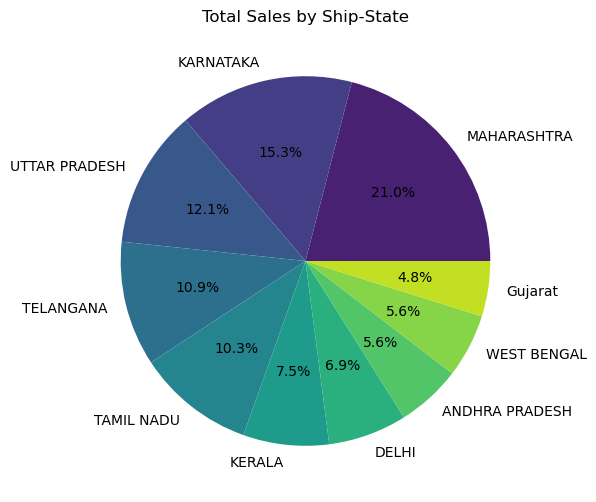

In [355]:
plt.figure(figsize=(10, 6))
plt.pie(gb, labels=gb.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(gb)))



plt.title("Total Sales by Ship-State")
plt.ylabel("")  

plt.show()

#as you 21 % of country cell in maharastra 

# which city most sell happens

C:\Users\hp\AppData\Local\Temp\ipykernel_8768\1778907399.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gb.index, y=gb.values, palette="viridis")


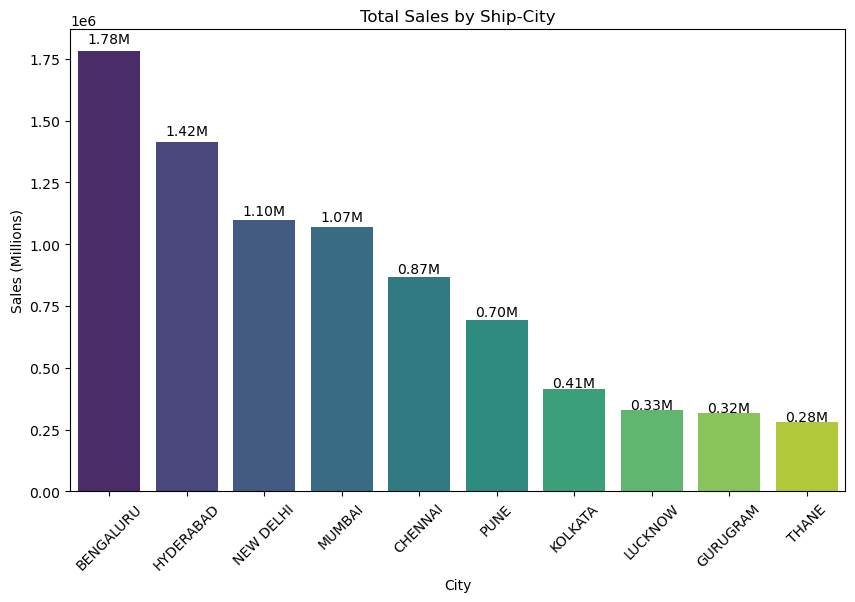

In [359]:
gb = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=gb.index, y=gb.values, palette="viridis")


plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Sales (Millions)")
plt.title("Total Sales by Ship-City")


for index, value in enumerate(gb.values):
    plt.text(x=index, y=value + (0.02 * value), s=f"{value / 1_000_000:.2f}M", ha='center')  # Converts to millions

plt.show()


#As you see in above figure that in  Bengaluru city  most sales done

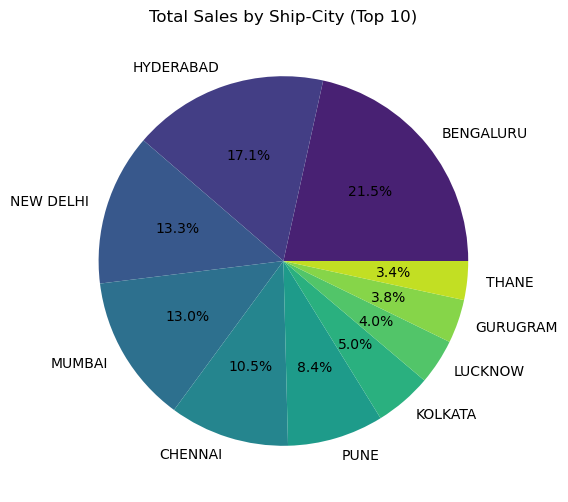

In [363]:
gb = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.pie(gb, labels=gb.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(gb)))


plt.title("Total Sales by Ship-City (Top 10)")
plt.ylabel("") 

plt.show()

#as see 21 % sales done in bemgaluru 

C:\Users\hp\AppData\Local\Temp\ipykernel_8768\1833389884.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")


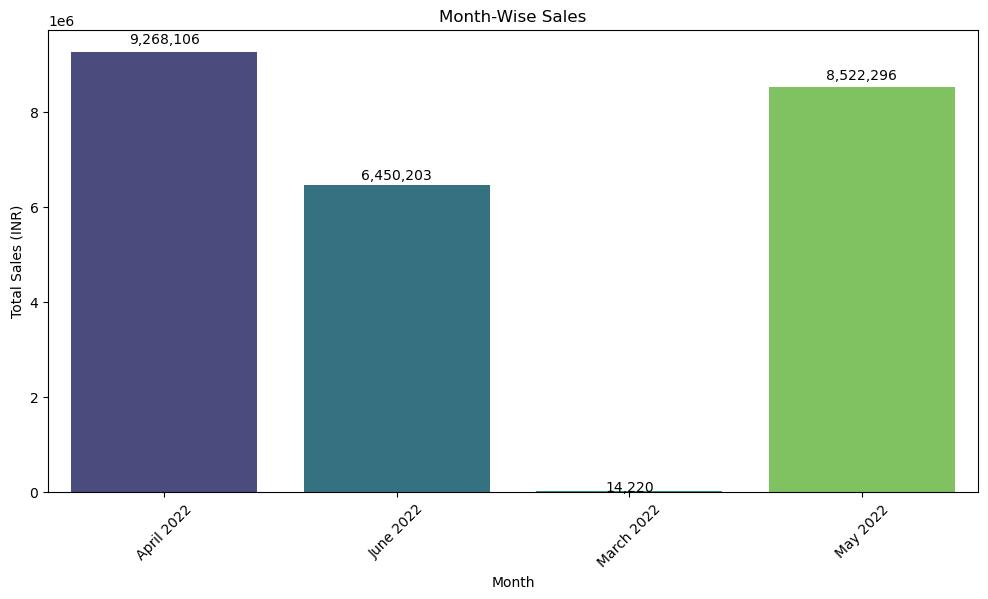

In [376]:
df['Month-Year'] = df['Date'].dt.strftime('%B %Y')  


monthly_sales = df.groupby('Month-Year')['Amount'].sum()


plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="viridis")

# Customizing the plot
plt.xticks(rotation=45) 
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.title("Month-Wise Sales")


for index, value in enumerate(monthly_sales.values):
    plt.text(x=index, y=value + (0.02 * value), s=f"{value:,.0f}", ha='center')  

plt.show()

#as you see in most sell happen in april month

In [381]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,Month-Year
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship,April 2022
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship,April 2022
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship,April 2022
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship,April 2022
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship,April 2022


C:\Users\hp\AppData\Local\Temp\ipykernel_8768\4221936605.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_count.index, y=status_count.values, palette="viridis")


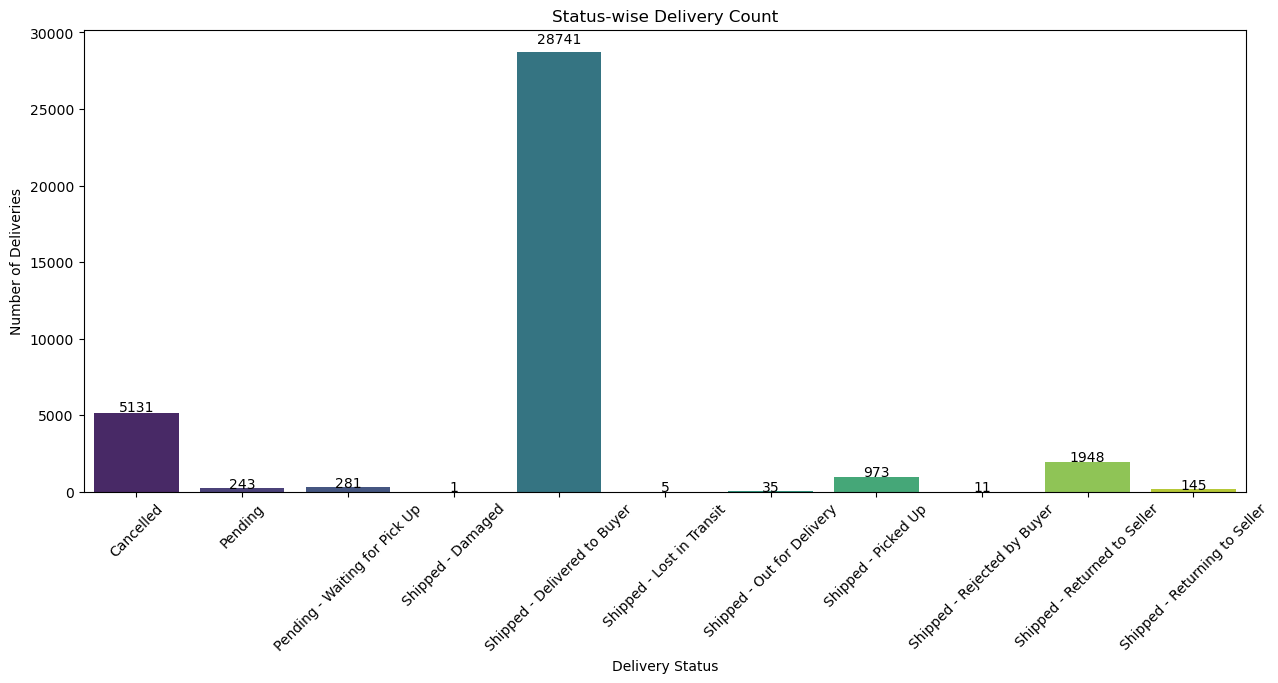

In [385]:

status_count = df.groupby('Status')['Fulfilment'].count()

# Plot the status-wise delivery count
plt.figure(figsize=(15, 6))
sns.barplot(x=status_count.index, y=status_count.values, palette="viridis")

# Customizing the plot
plt.xticks(rotation=45)
plt.xlabel("Delivery Status")
plt.ylabel("Number of Deliveries")
plt.title("Status-wise Delivery Count")

for index, value in enumerate(status_count.values):
    plt.text(x=index, y=value + (0.02 * value), s=f"{value}", ha='center')

plt.show()


In [ ]:
# as you see in above diagram most of delivary sales